In [22]:
# 데이터 처리
from __future__ import print_function
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import time
# 머신러닝 알고리즘 및 평가
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('loan_data.csv')

In [4]:
data.head()

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
0,40,6,6,6,0,0,0,4500,0,16,...,1.52,120,500,0,120,0,M,A,A,0
1,35,9,9,0,0,1,0,3700,0,9,...,2.14,100,800,0,0,0,M,C,B,0
2,55,9,9,0,0,0,0,6400,0,1,...,0.50,50,700,0,0,0,M,C,B,0
3,55,42,0,42,0,5,0,8900,0,13,...,2.61,80,900,0,0,0,M,B,C,0
4,40,36,36,36,0,3,1,0,0,2,...,2.11,10,900,0,0,1,F,B,B,0


In [8]:
data['SEX'] = data['SEX'].map({'M':1,'F':0})
data['PAY_METHOD'] = data['PAY_METHOD'].map({'A':1,'B':2, 'C':3, 'D':4})
data['JOB'] = data['JOB'].map({'A':1,'B':2, 'C':3, 'D':4})

In [9]:
# 의미없는 변수 제거: 
#dat_processing = dat.drop(['ID','ZIP Code'], axis=1, inplace=False)
dat_processing = data
dat_processing.columns

Index(['AGE', 'TOT_LOAN', 'TOT_LOAN_CRD', 'LOAN_BNK', 'LOAN_CPT', 'CRDT_CNT',
       'GUARN_CNT', 'INCOME', 'LOAN_CRD_CNT', 'LATE_RATE', 'LATE_RATE_1Y',
       'INS_MON_MAX', 'CANCEL_CNT_1Y', 'CALL_TIME', 'TEL_COST_MON',
       'MOBILE_PRICE', 'SUSP_DAY', 'LATE_TEL', 'COMB_COMM', 'SEX',
       'PAY_METHOD', 'JOB', 'TARGET'],
      dtype='object')

In [10]:
# Normalization
dat_processing_norm = preprocessing.minmax_scale(dat_processing)
dat_processed = pd.DataFrame(dat_processing_norm)
dat_processed.columns = dat_processing.columns

C:\Users\user\AppData\Local\conda\conda\envs\AIPJT\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64.
  


In [12]:
dat_processed.shape

(43386, 23)

In [13]:
dat_processed

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
0,0.4,0.006036,0.006036,0.006356,0.000000,0.000000,0.0,0.45,0.000000,0.16,...,0.001000,0.126316,0.416667,0.000000,0.100000,0.0,1.0,0.000000,0.000000,0.0
1,0.3,0.009054,0.009054,0.000000,0.000000,0.090909,0.0,0.37,0.000000,0.09,...,0.001408,0.105263,0.666667,0.000000,0.000000,0.0,1.0,0.666667,0.333333,0.0
2,0.7,0.009054,0.009054,0.000000,0.000000,0.000000,0.0,0.64,0.000000,0.01,...,0.000329,0.052632,0.583333,0.000000,0.000000,0.0,1.0,0.666667,0.333333,0.0
3,0.7,0.042254,0.000000,0.044492,0.000000,0.454545,0.0,0.89,0.000000,0.13,...,0.001717,0.084211,0.750000,0.000000,0.000000,0.0,1.0,0.333333,0.666667,0.0
4,0.4,0.036217,0.036217,0.038136,0.000000,0.272727,0.1,0.00,0.000000,0.02,...,0.001388,0.010526,0.750000,0.000000,0.000000,1.0,0.0,0.333333,0.333333,0.0
5,0.5,0.141851,0.018109,0.111229,0.109635,0.636364,0.0,0.00,0.000000,0.11,...,0.001000,0.084211,0.666667,0.000000,0.000000,1.0,1.0,0.333333,0.333333,0.0
6,0.5,0.350101,0.000000,0.000000,0.000000,0.272727,0.0,0.79,0.000000,0.03,...,0.000454,0.126316,0.750000,0.000370,0.000000,0.0,0.0,0.666667,0.666667,0.0
7,0.3,0.123742,0.123742,0.000000,0.000000,0.272727,0.0,0.39,0.000000,0.00,...,0.002145,0.084211,0.750000,0.000000,0.000000,1.0,0.0,0.666667,0.666667,0.0
8,0.4,0.202213,0.024145,0.212924,0.000000,0.363636,0.0,0.00,0.000000,0.11,...,0.001033,0.063158,0.416667,0.000000,0.000000,1.0,0.0,0.666667,0.333333,0.0
9,0.3,0.075453,0.075453,0.079449,0.000000,0.181818,0.0,0.44,0.000000,0.06,...,0.005224,0.105263,0.000000,0.000000,0.000000,1.0,0.0,0.333333,0.333333,0.0


C:\Users\user\AppData\Local\conda\conda\envs\AIPJT\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\user\AppData\Local\conda\conda\envs\AIPJT\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\AppData\Local\conda\conda\envs\AIPJT\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\user\AppData\Local\conda\conda\envs\AIPJT\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encounte

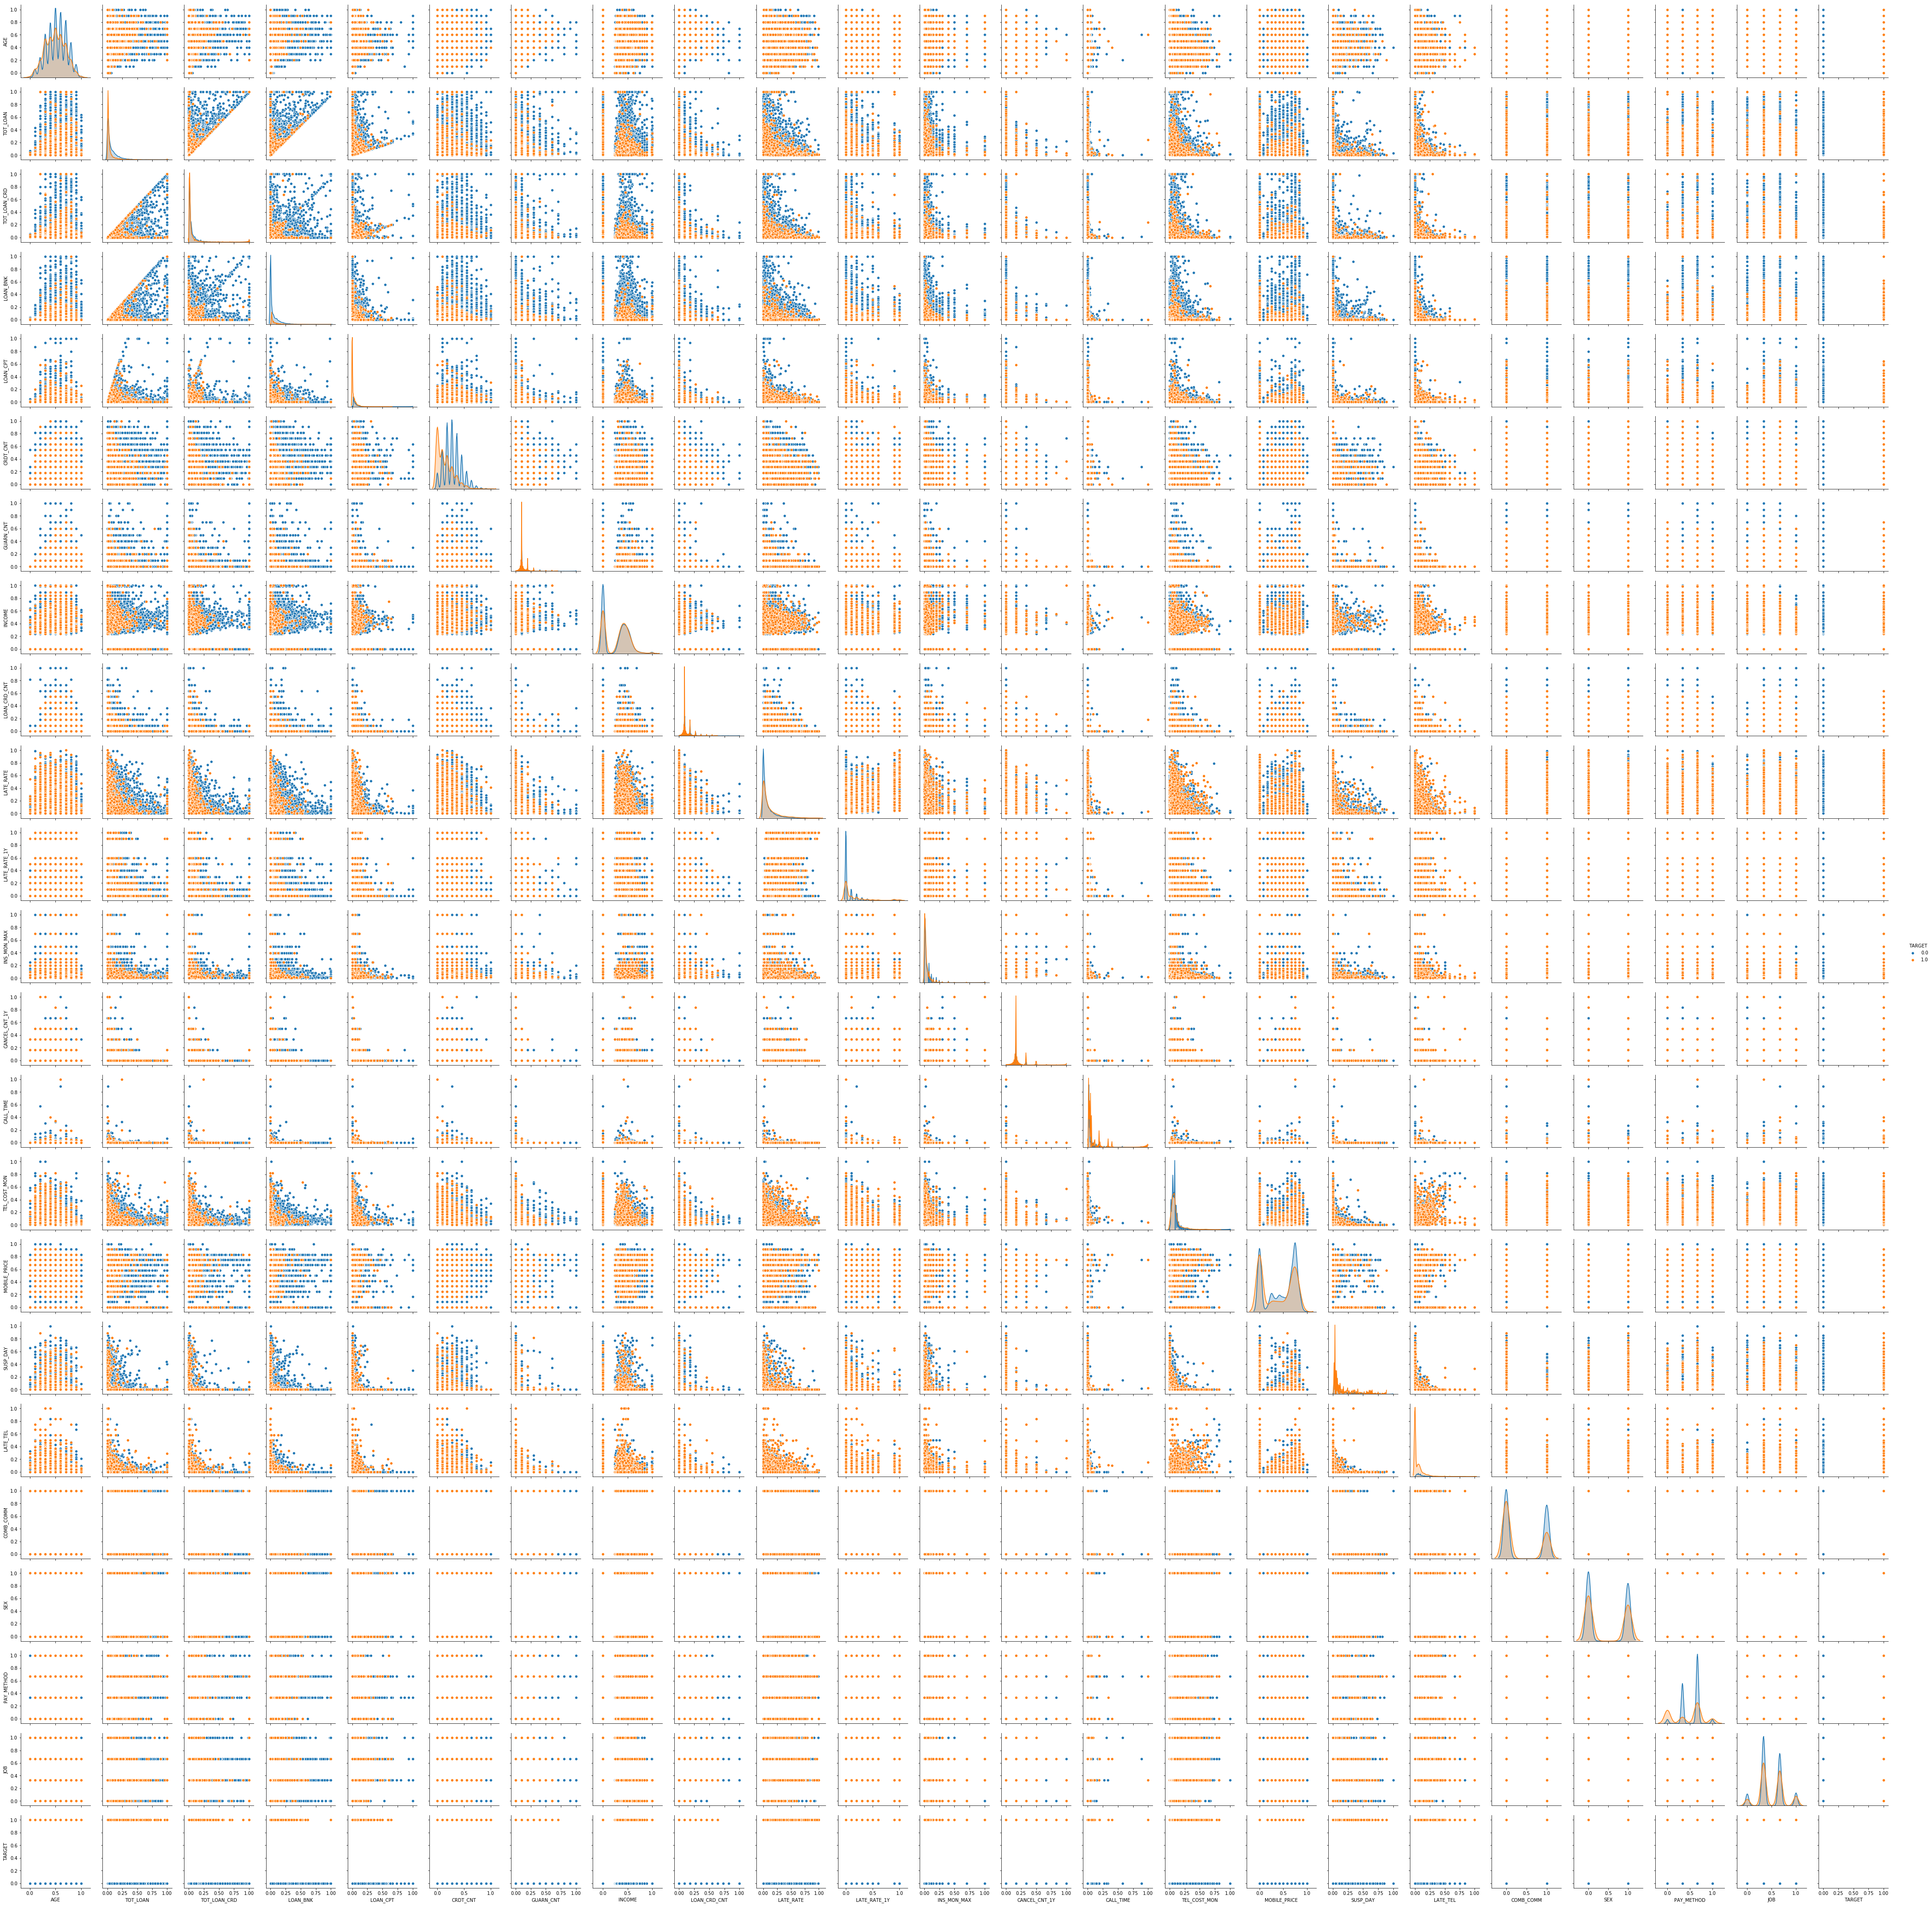

In [14]:
# EDA
# scatter plot
#sns.set(style='whitegrid', context='notebook')
sns.pairplot(dat_processed, hue="TARGET")
plt.show()

In [15]:
X = data.loc[:,data.columns != 'TARGET']
y = data.TARGET

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 2017020558)

In [19]:
rf_clf = RandomForestClassifier(random_state=2017020558)

In [23]:
np.random.seed(2017020558)
start = time.time()

param_dict = {'max_depth': [2,3,4,5],
             'max_features' : ['auto','sqrt','log2', None],
             'criterion': ['gini','entropy']}

cv_rf = GridSearchCV(rf_clf, cv=5,
                    param_grid=param_dict,
                    n_jobs = 3)

cv_rf.fit(X_train, y_train)

print('Best Parameters using grid search: \n',
     cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {:.2f}'.format(end-start))

C:\Users\user\AppData\Local\conda\conda\envs\AIPJT\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 5, 'max_features': None}
Time taken in grid search: 11.12


In [24]:
rf_clf.set_params(criterion='entropy', max_depth=4, max_features=None)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=2017020558, verbose=0,
            warm_start=False)

In [25]:
rf_clf.set_params(oob_score=True)

min_estimators = 5
max_estimators = 200

error_rate = {}
for i in range(min_estimators, max_estimators + 1):
    rf_clf.set_params(n_estimators=i)
    rf_clf.fit(X_train, y_train)
    
    oob_error = 1 - rf_clf.oob_score_
    error_rate[i] = oob_error

C:\Users\user\AppData\Local\conda\conda\envs\AIPJT\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\AppData\Local\conda\conda\envs\AIPJT\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\user\AppData\Local\conda\conda\envs\AIPJT\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\AppData\Local\conda\conda\envs\AIPJT\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\user\AppData\Local\conda\co

In [26]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 5 to 200trees)')

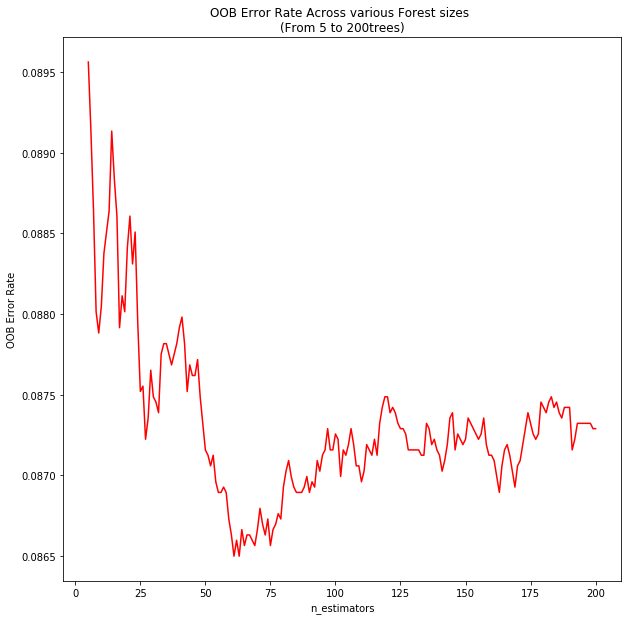

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
oob_series.plot(kind='line',
                color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 5 to 200trees)')

In [28]:
print('OOB Error rate for 100 trees is: {0:.5f}'.format(oob_series[100]))

OOB Error rate for 100 trees is: 0.08726


In [29]:
rf_clf.set_params(n_estimators=100,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=2017020558, verbose=0,
            warm_start=False)

In [30]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=2017020558, verbose=0,
            warm_start=False)

In [31]:
imp = rf_clf.feature_importances_
imp = pd.DataFrame([X.columns, imp]).T
imp.columns = ['variables', 'importance']
sorted_idx = np.argsort(imp['importance'])[::-1]
imp = imp.iloc[sorted_idx,:]
print(imp[imp['importance'] > 0.01])

       variables importance
17      LATE_TEL    0.37911
5       CRDT_CNT   0.341531
3       LOAN_BNK   0.122624
20    PAY_METHOD  0.0586301
4       LOAN_CPT  0.0405185
10  LATE_RATE_1Y  0.0147578
15  MOBILE_PRICE   0.014542
0            AGE  0.0103928


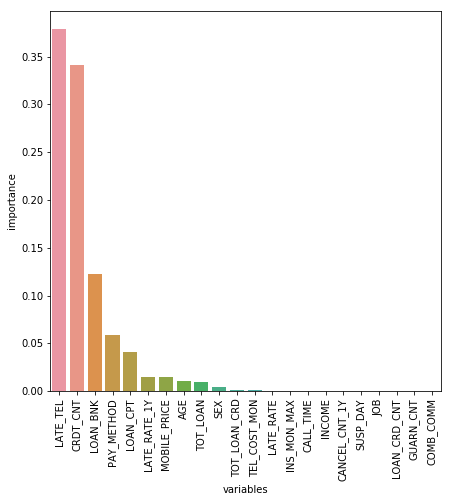

In [32]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x='variables', y='importance', data=imp, ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show(fig)

In [33]:
y_test_pred = rf_clf.predict(X_test)
print('- Accuracy (Test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
print('- F1 score (Test) : {:.4}'.format(f1_score(y_test, y_test_pred)))

- Accuracy (Test) : 0.9106
- F1 score (Test) : 0.2342


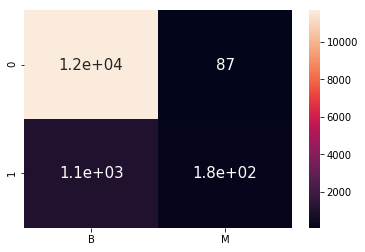

In [34]:
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test = pd.DataFrame(cm_test, columns=['B', 'M'])
sns.heatmap(data=cm_test, annot=True, annot_kws={'size': 15})